**House Prices - Advanced Regression Techniques** is popular dataset for beginners. In this kernel I will show my method of data preparation, analysis and models.

# 1.Importing libraries and first analysis

Let's start with importing basic libraries and dataset. We will import models later.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

Now, we'll see what we are working with.

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

We have two sets: train set with 1460 rows and 81 columns and test set with 1459 rows and 80 columns. There is a lot of parameters to work with. Also, there is a lot of missing values. 

As we know, main goal of these work is to predict prices of houses. Let's create heatmap to see, how integer parameters correlte with each other.

<AxesSubplot:>

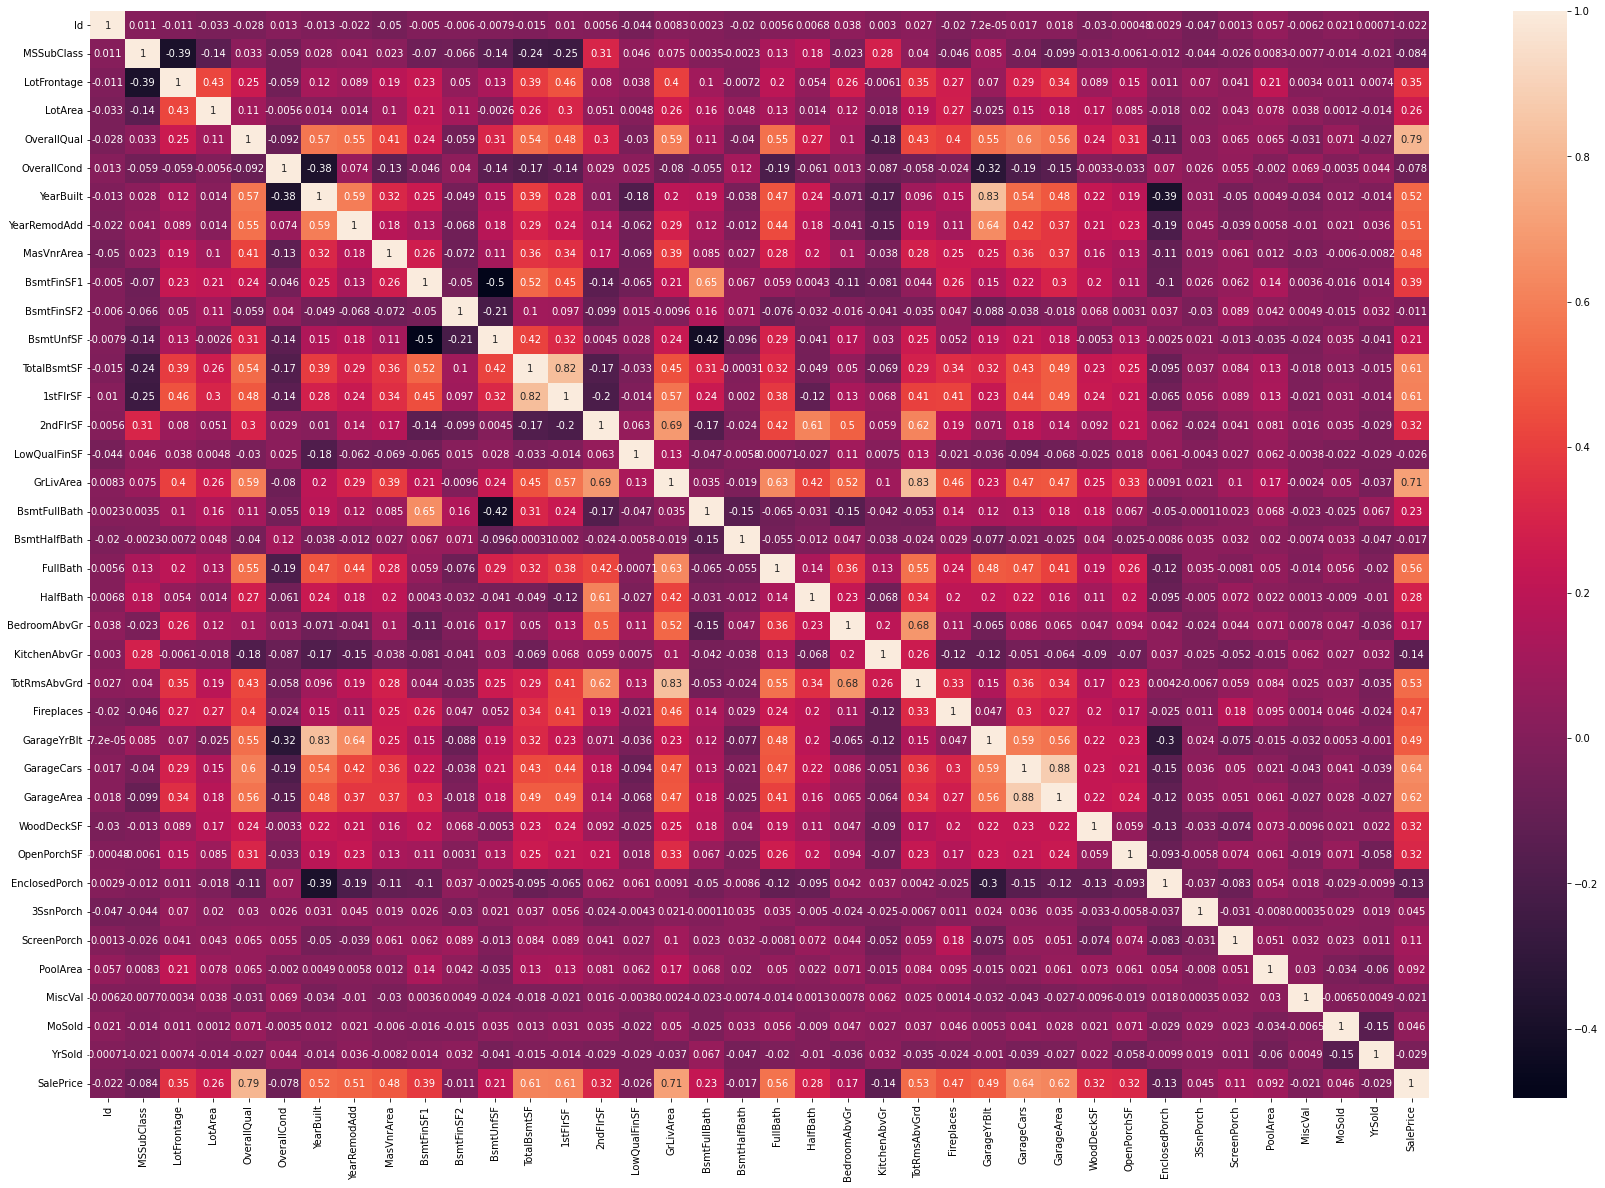

In [5]:
plt.figure(figsize=(30,20))
sns.heatmap(data=train_df.corr(), annot=True)

The map shows that some parameters such as 'EnclosedPorch', 'PoolArea' etc. have almost zero correlation with another while other have correlation close to 1. Now, we create a list with parameters which are correlated the best with 'SalePrice'. We will use corr. coefficient 0.3 as a condition.

In [6]:
spcor = train_df.corr()['SalePrice'].sort_values(axis=0, ascending=False, inplace=False)
hcor = list(spcor.loc[np.where(spcor>0.3, 1, 0)==1].index)
hcor

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF']

There are total of  19 parameters. We will create the heatmap again.

<AxesSubplot:>

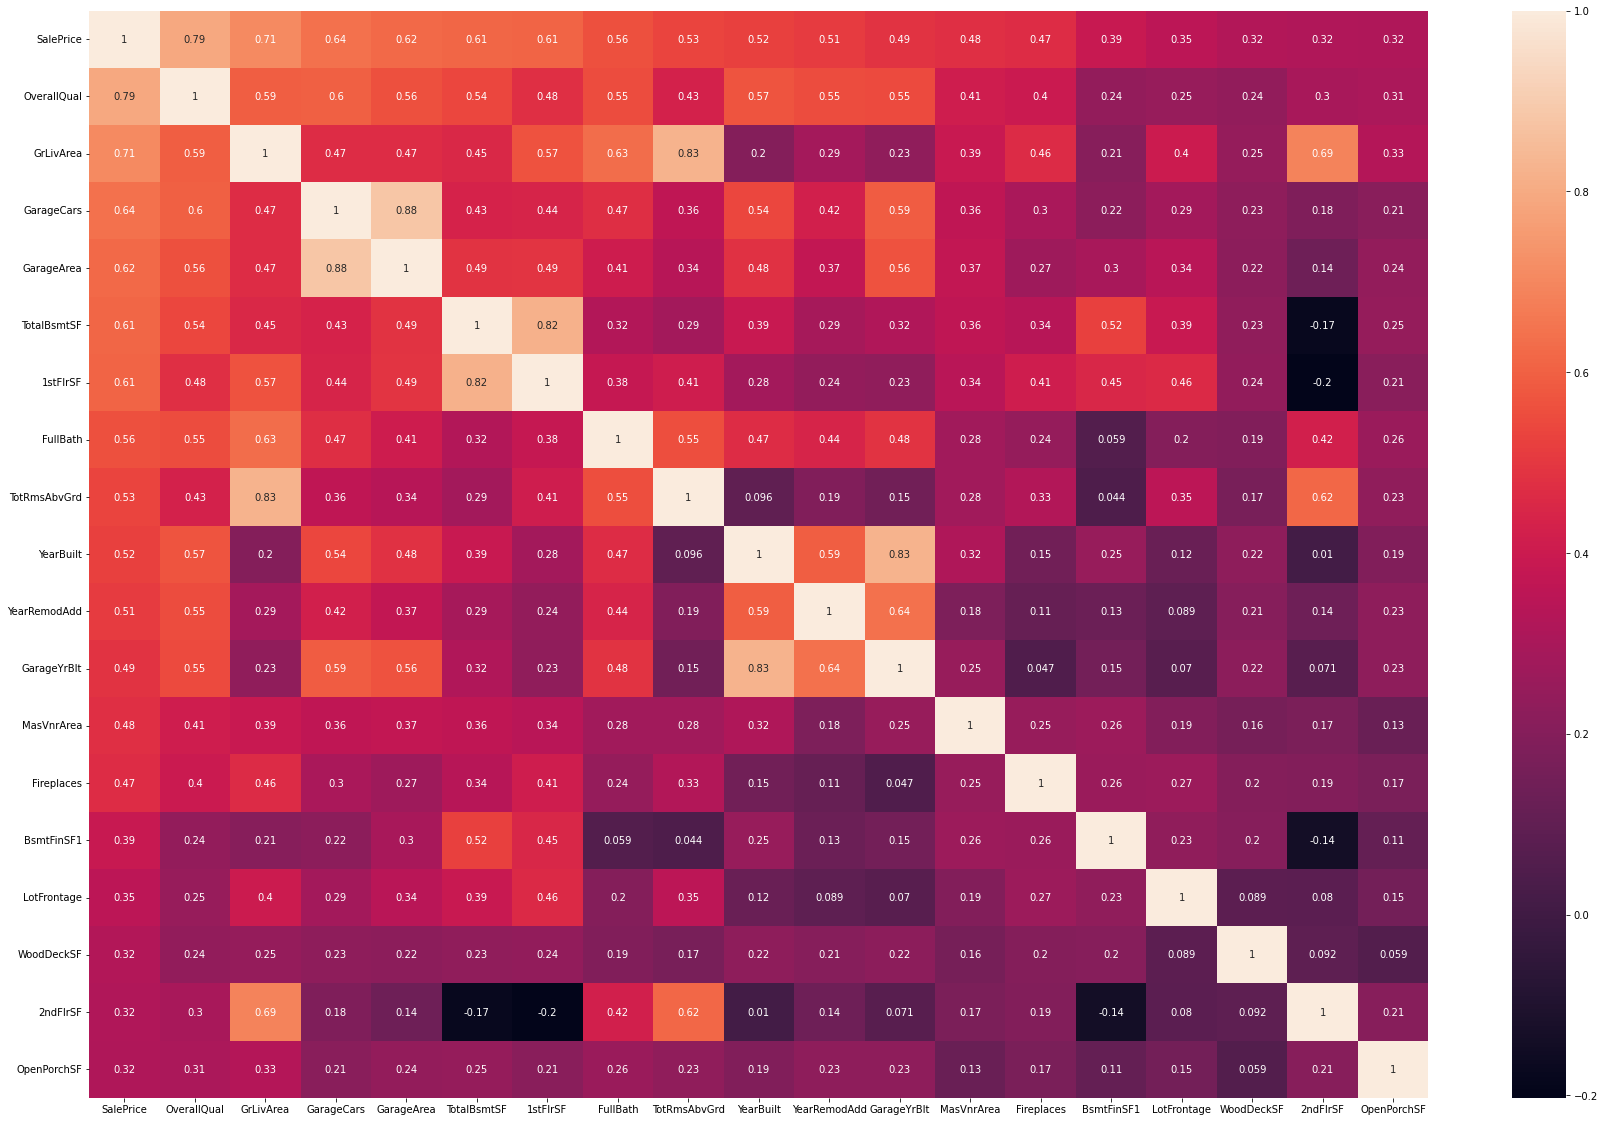

In [7]:
plt.figure(figsize=(30,20))
sns.heatmap(data=train_df[hcor].corr(), annot=True)

The most important parameters are 'OverallQual' and area parameters. Even the least important parameters with, minor exeption, are about area. This is not surprise. After all the most important in the house is its condition and its size. 

# 2.Analysis of most important parameters

Let's analyse our list of highly correlated parameters. We will start with 'OverallQual'

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

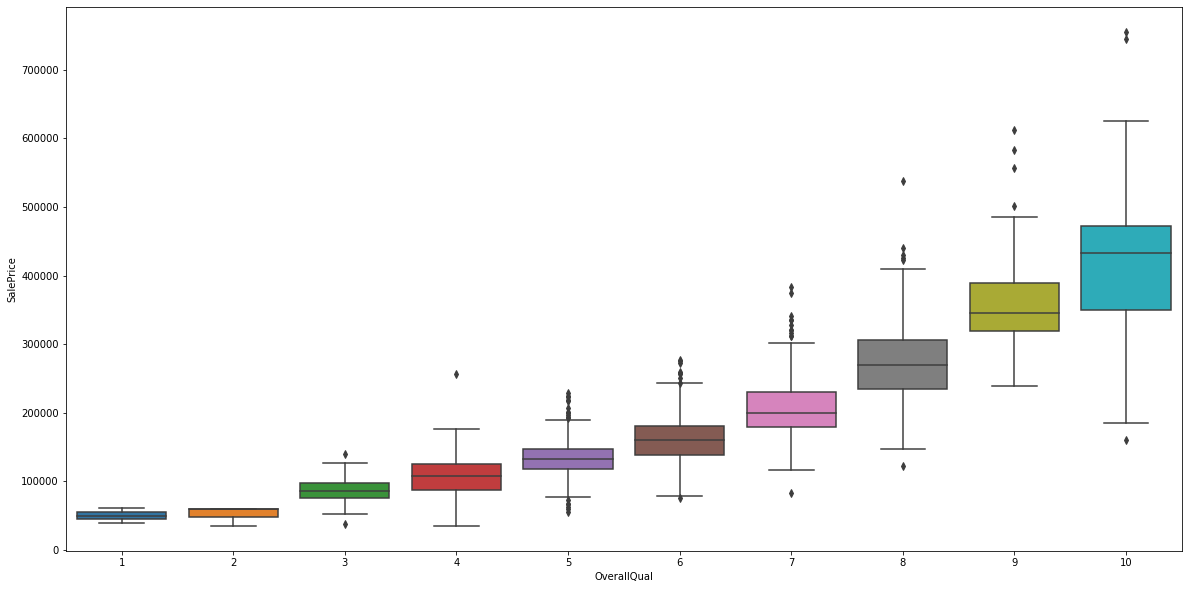

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train_df['OverallQual'],y=train_df['SalePrice'],data=train_df)

This looks pretty simple: the higher quality - the higher price. Now we move to the 'GrLivArea'

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

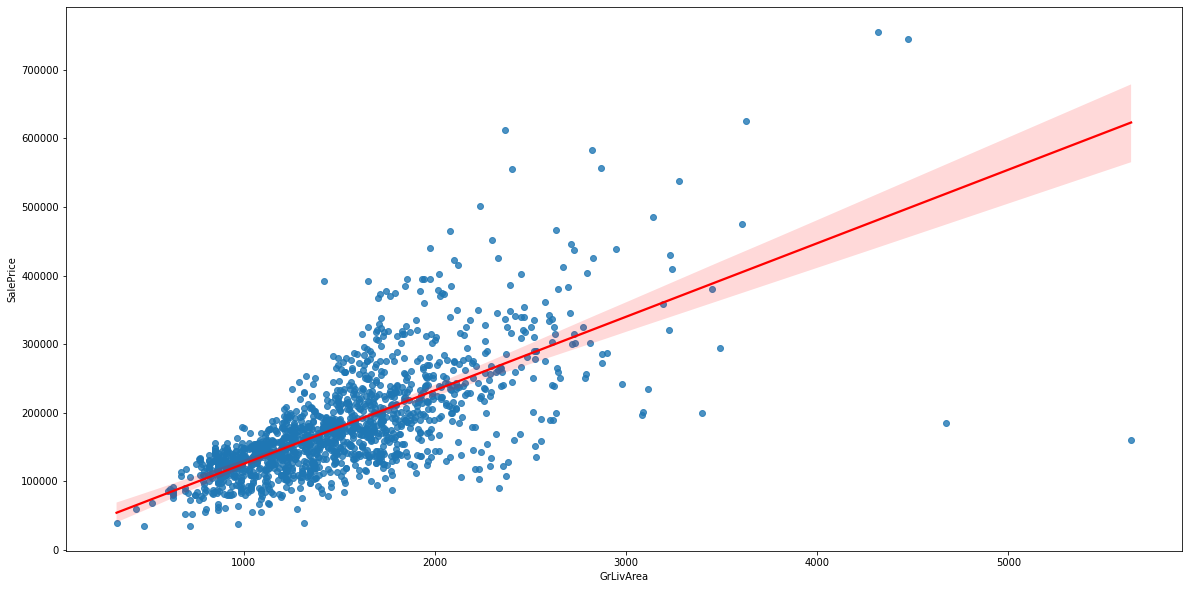

In [9]:
plt.figure(figsize=(20,10))
sns.regplot(x=train_df['GrLivArea'],y=train_df['SalePrice'],data=train_df, ci=95, line_kws={"color": "red"})

The plot shows good linearity, but there is two outliers (points which don't follow general condition). Two houses with area bigger than 4000 SF have Sale Price under 200 000 USD which is quite unusual. We will drop them from our dataset.

In [10]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

Next parameter is 'GarageCars'

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

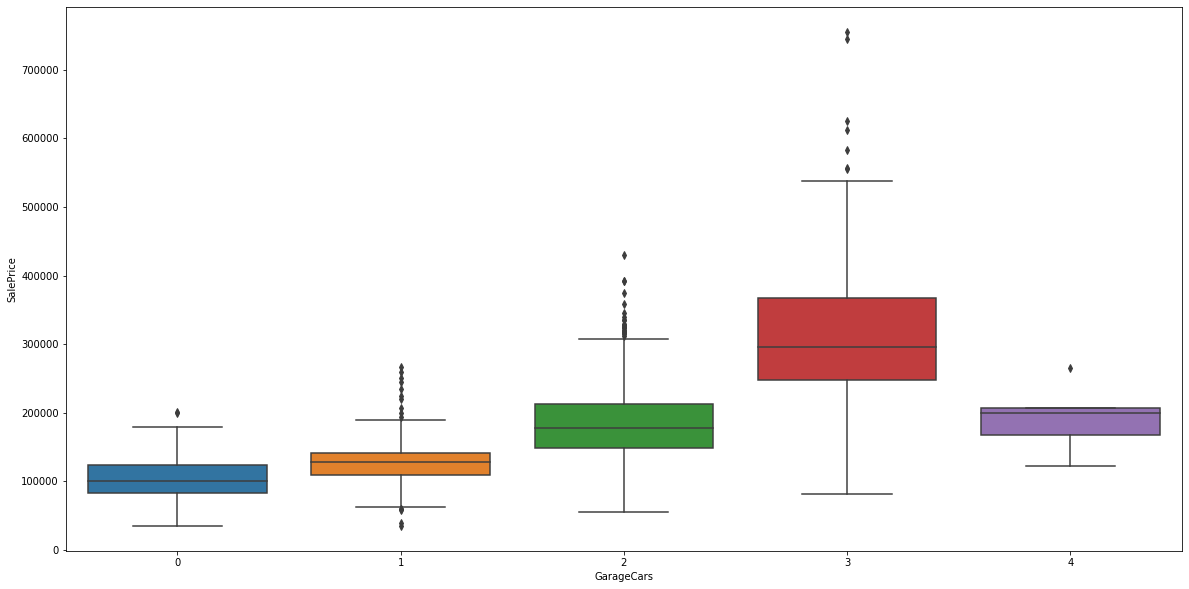

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train_df['GarageCars'],y=train_df['SalePrice'],data=train_df)

Next is 'TotalBsmt'

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

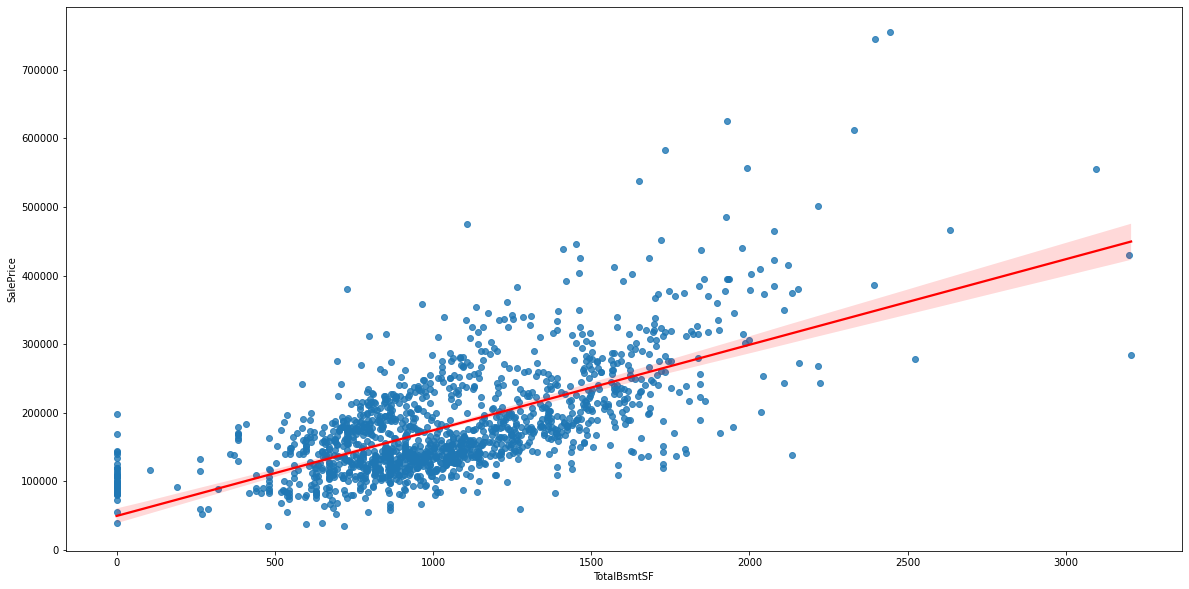

In [12]:
plt.figure(figsize=(20,10))
sns.regplot(x=train_df['TotalBsmtSF'],y=train_df['SalePrice'],data=train_df, line_kws={"color": "red"})

Again, plot shows good regression. '1stFlrSF' has almost 1 in correlation with 'TotalBsmtSF' so we'll drop it. Next parameter is 'FullBath'

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

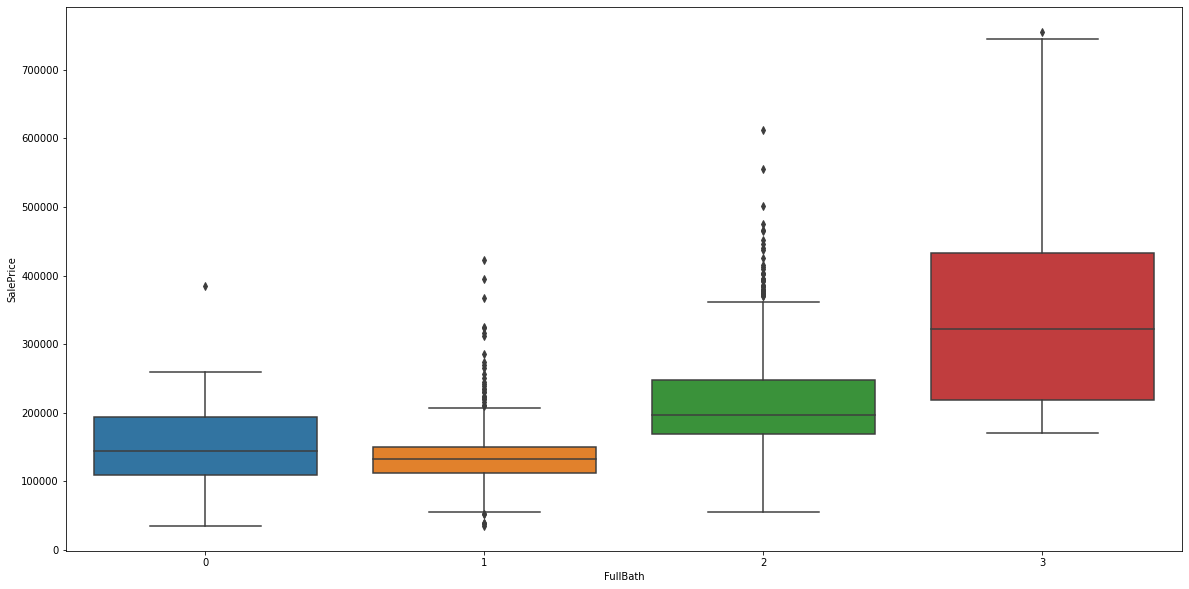

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train_df['FullBath'],y=train_df['SalePrice'],data=train_df)

The more baths - the higher price. Interesting differenciation of prices for houses with 3 baths.

Next is 'TotRmsAbvGrd'

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

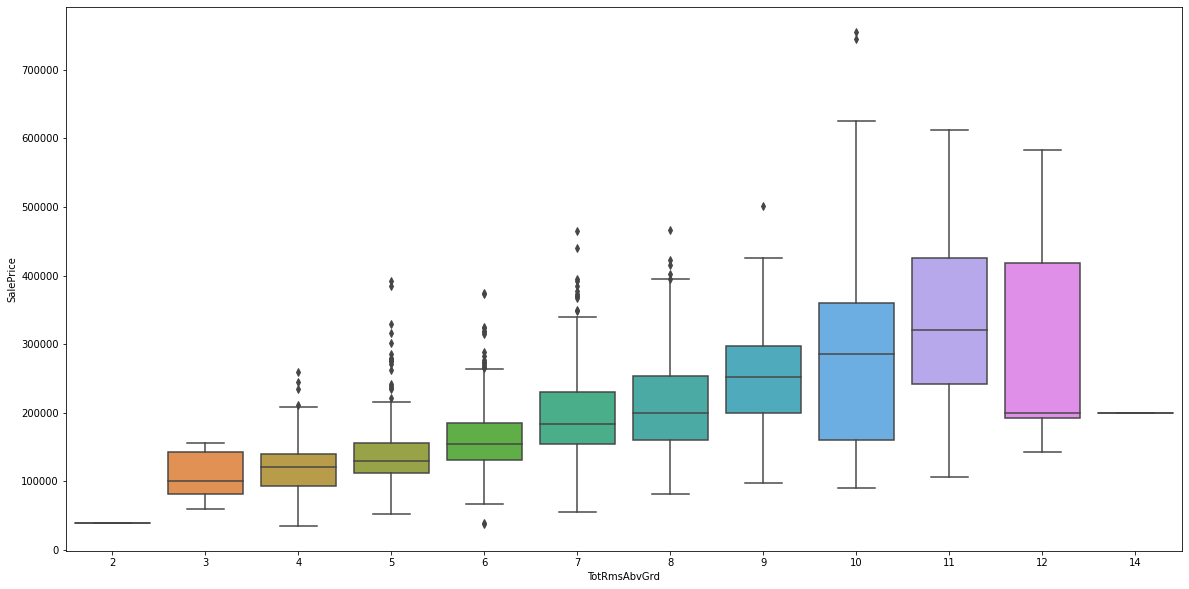

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train_df['TotRmsAbvGrd'],y=train_df['SalePrice'],data=train_df)

We have a good correlation until the parameter reaches number 10. Then it start fluctuating a litle. The house with 14 rooms looks like an outlier. Let's drop it.

In [15]:
train_df = train_df.drop(train_df[train_df['TotRmsAbvGrd']==14].index)

Next parameter is 'YearBuilt' 

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

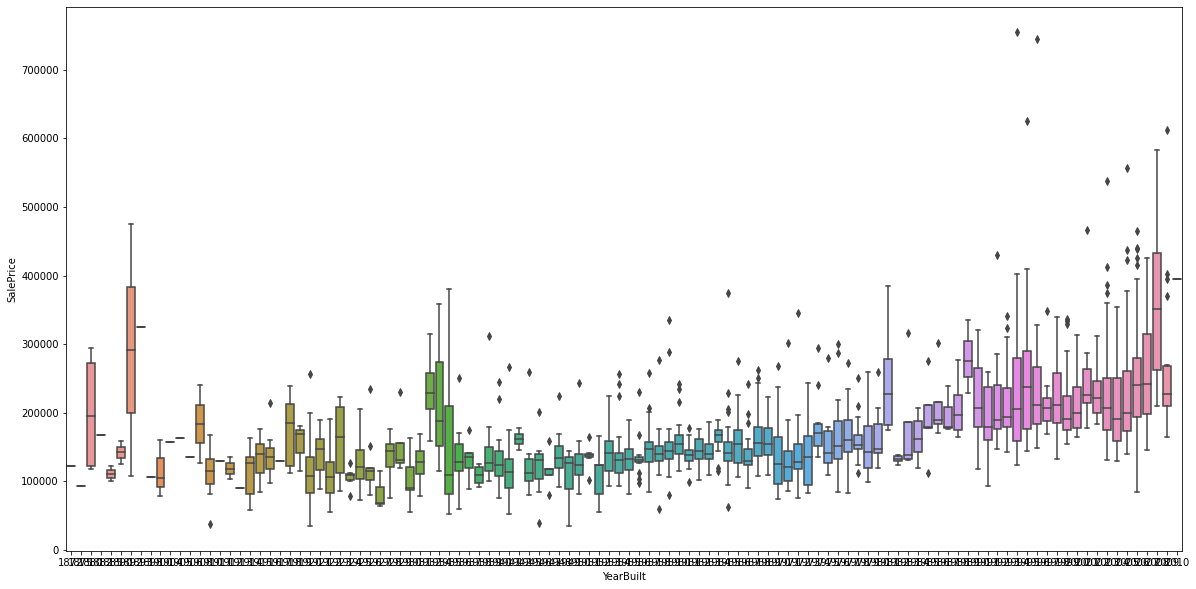

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train_df['YearBuilt'],y=train_df['SalePrice'],data=train_df)

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

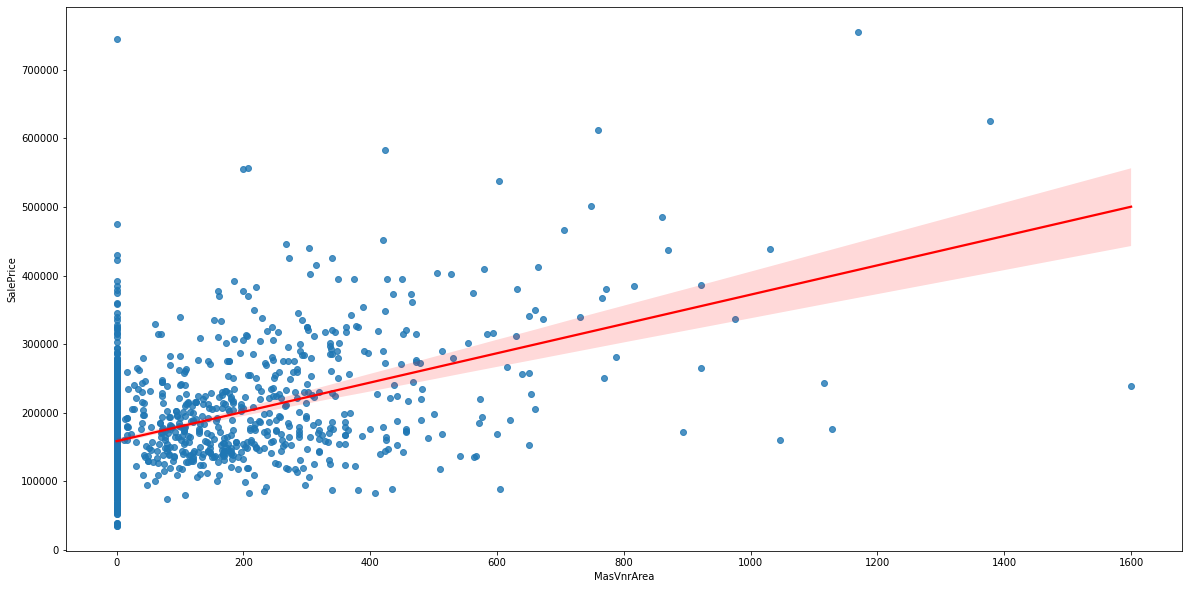

In [17]:
plt.figure(figsize=(20,10))
sns.regplot(x=train_df['MasVnrArea'],y=train_df['SalePrice'],data=train_df, line_kws={"color": "red"})

There is one outlier with area of 1600 SF wich has a low price. We will drop it.

In [18]:
train_df = train_df.drop(train_df[train_df['MasVnrArea']==1600].index)

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

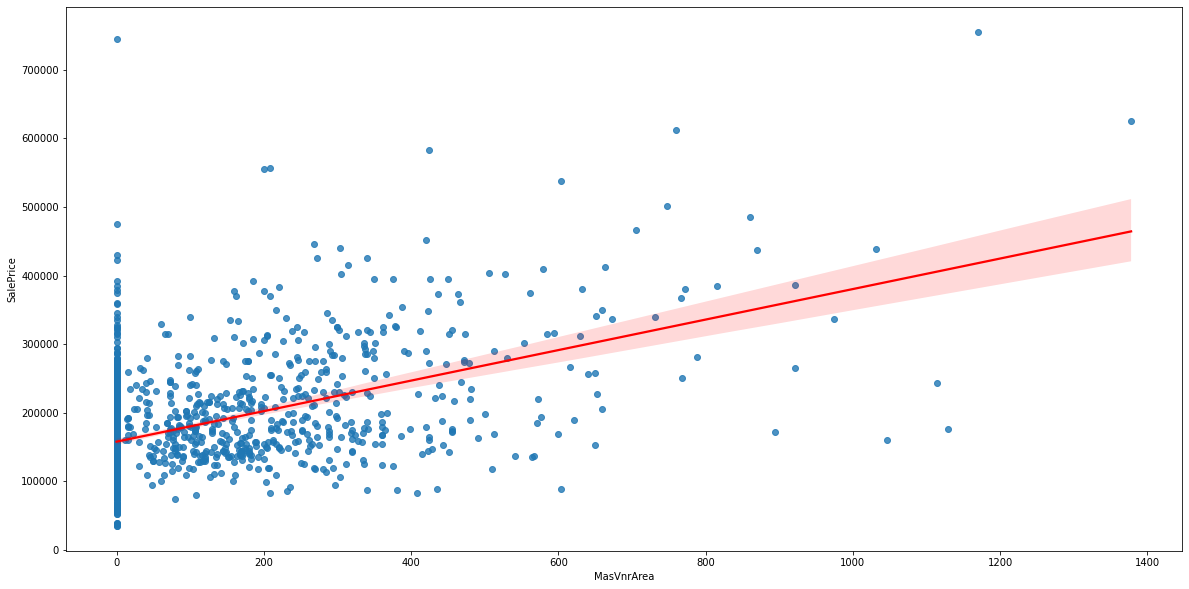

In [19]:
plt.figure(figsize=(20,10))
sns.regplot(x=train_df['MasVnrArea'],y=train_df['SalePrice'],data=train_df, line_kws={"color": "red"})

Now it looks better. Next is 'LotFrontage'

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

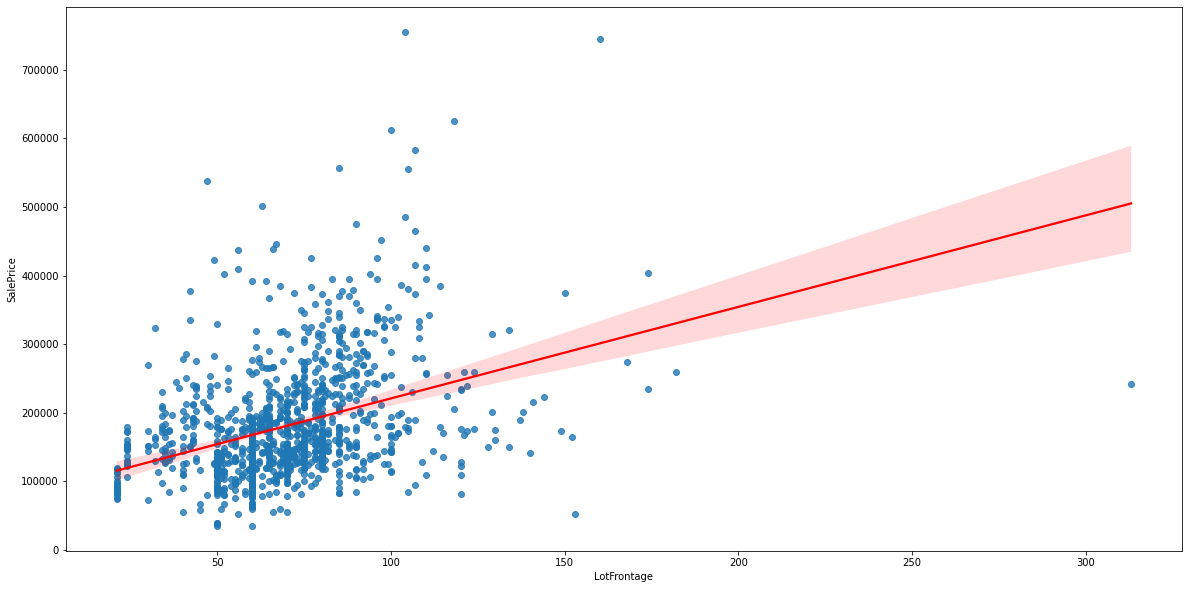

In [20]:
plt.figure(figsize=(20,10))
sns.regplot(x=train_df['LotFrontage'],y=train_df['SalePrice'],data=train_df, line_kws={"color": "red"})

There is a definetly outlier with LotFrontage > 300. Let's drop it.

In [21]:
train_df.drop(train_df[train_df['LotFrontage'] > 300].index, inplace=True)

I've skipped some parameters for the sake of keeping  length of this kernel as little as  possible. Now we move to the next chapter.

# 3.Filling missing values

Let's count missing values for each parameter.

In [22]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = ((train_df.isnull().sum()/train_df.isnull().count()*100)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1449,99.587629
MiscFeature,1401,96.288660
Alley,1366,93.883162
Fence,1174,80.687285
FireplaceQu,689,47.353952
LotFrontage,259,17.800687
GarageYrBlt,80,5.498282
GarageCond,80,5.498282
GarageType,80,5.498282
GarageFinish,80,5.498282


In [23]:
total = test_df.isnull().sum().sort_values(ascending=False)
percent = ((test_df.isnull().sum()/test_df.isnull().count()*100)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


We have several parameters with number of missing values higher than 80% of total number of values. Also test set has a lot of parameters with just one missing value which we still need to fill. Let's create heatmaps for visualisation of missing values.

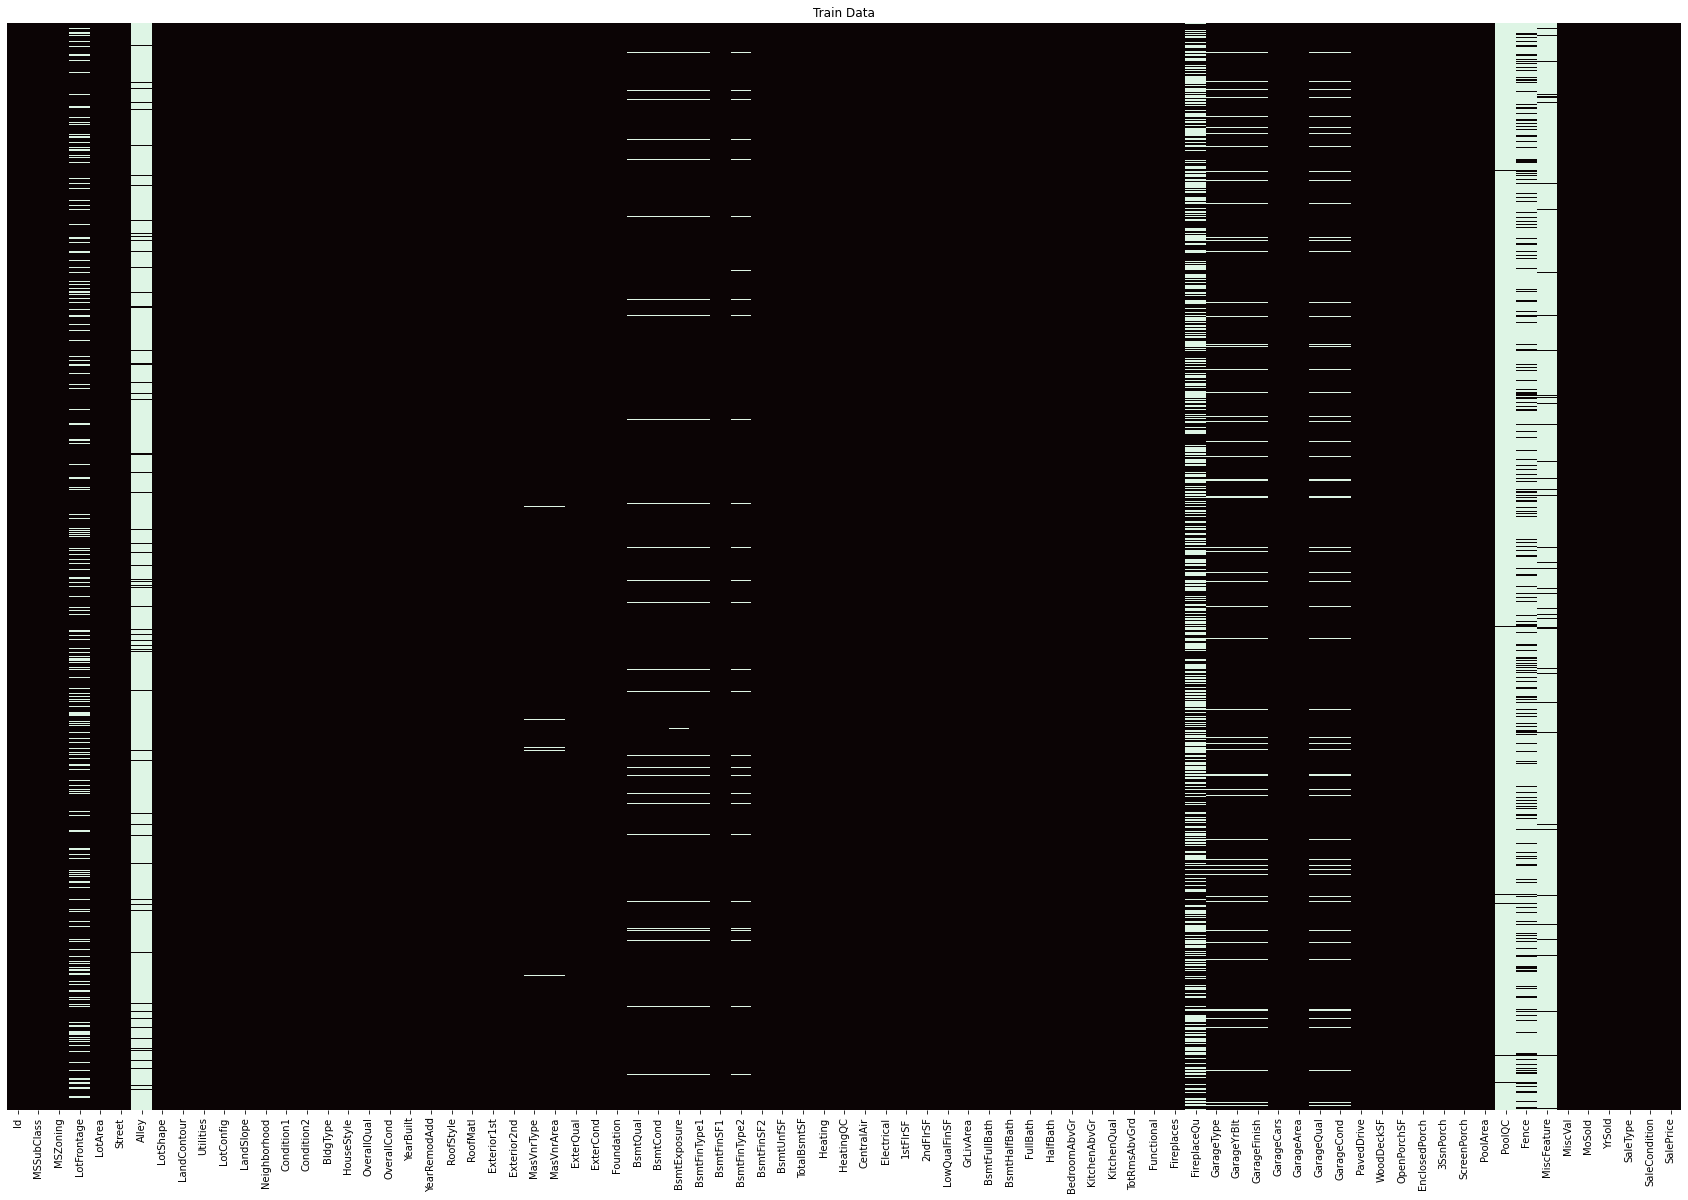

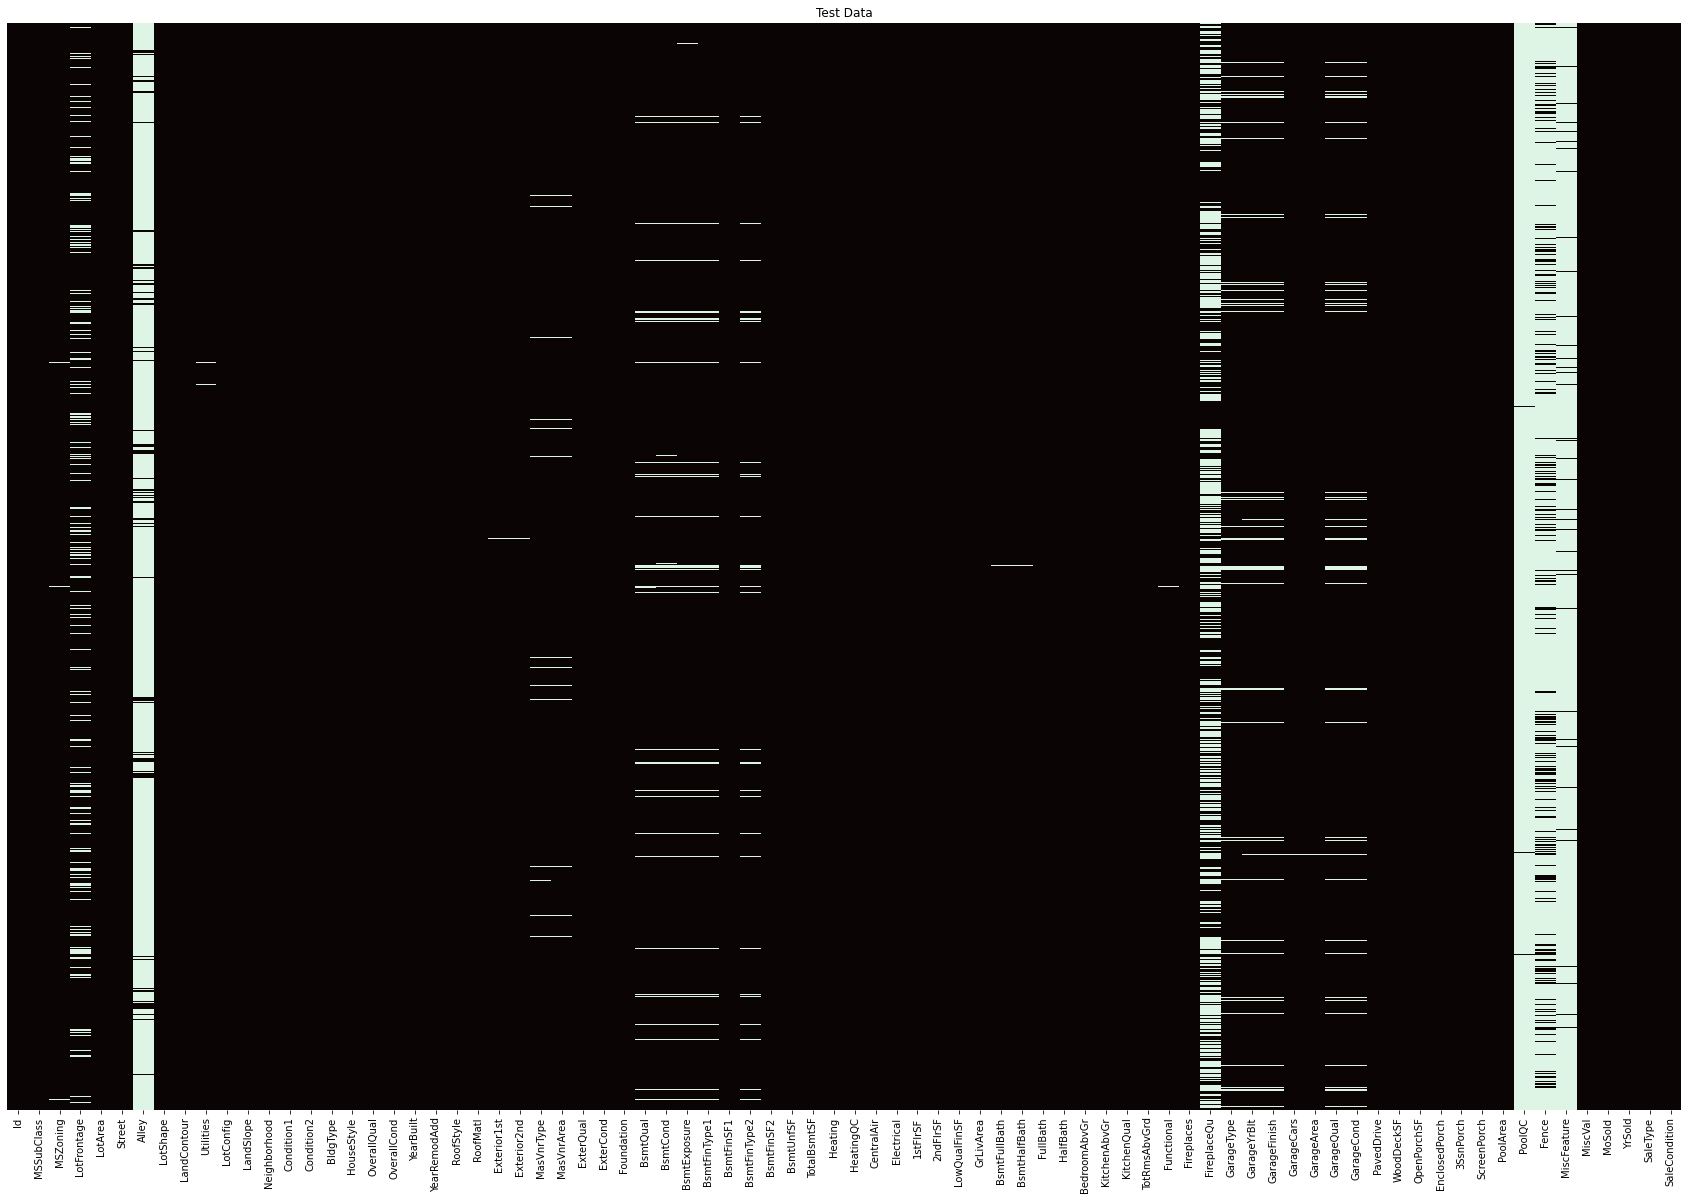

In [24]:
plt.figure(figsize =(30,20))
m1 = sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='mako')
m1.set_title('Train Data')
plt.show()

plt.figure(figsize =(30,20))
m2 = sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='mako')
m2.set_title('Test Data')
plt.show()

Let's drop parameters where percent of missing value is above 80.

In [25]:
train_df = train_df.drop('PoolQC',axis=1)
train_df = train_df.drop('MiscFeature', axis=1)
train_df = train_df.drop('Alley', axis=1)
train_df = train_df.drop('Fence', axis=1)

test_df = test_df.drop('PoolQC',axis=1)
test_df = test_df.drop('MiscFeature', axis=1)
test_df = test_df.drop('Alley', axis=1)
test_df = test_df.drop('Fence', axis=1)

'FirePlaceQu''s missing values means there is no Fireplace. We fill it with 'None'

In [26]:
train_df.loc[train_df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'None'
test_df.loc[test_df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'None'

'BsmtQual', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2' missing values means no basement. We fill it with 'None'

In [27]:
train_df.loc[train_df['BsmtQual'].isnull(), 'BsmtQual'] = 'None'
train_df.loc[train_df['BsmtCond'].isnull(), 'BsmtCond'] = 'None'
train_df.loc[train_df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'None'
train_df.loc[train_df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'None'
train_df.loc[train_df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'None'

test_df.loc[test_df['BsmtQual'].isnull(), 'BsmtQual'] = 'None'
test_df.loc[test_df['BsmtCond'].isnull(), 'BsmtCond'] = 'None'
test_df.loc[test_df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'None'
test_df.loc[test_df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'None'
test_df.loc[test_df['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'None'

Missing garage values means, there is no garage. We fill it with 'NoGarage' and 0 for 'GarageYrBlt'

In [28]:
train_df.loc[train_df['GarageType'].isnull(), 'GarageType'] = 'NoGarage'
train_df.loc[train_df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0
train_df.loc[train_df['GarageFinish'].isnull(), 'GarageFinish'] = 'NoGarage'
train_df.loc[train_df['GarageCond'].isnull(), 'GarageCond'] = 'NoGarage'
train_df.loc[train_df['GarageQual'].isnull(), 'GarageQual'] = 'NoGarage'

test_df.loc[test_df['GarageType'].isnull(), 'GarageType'] = 'NoGarage'
test_df.loc[test_df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0
test_df.loc[test_df['GarageFinish'].isnull(), 'GarageFinish'] = 'NoGarage'
test_df.loc[test_df['GarageCond'].isnull(), 'GarageCond'] = 'NoGarage'
test_df.loc[test_df['GarageQual'].isnull(), 'GarageQual'] = 'NoGarage'

Now it is 'MasVnrType'. Let's check this parameter by countplot.

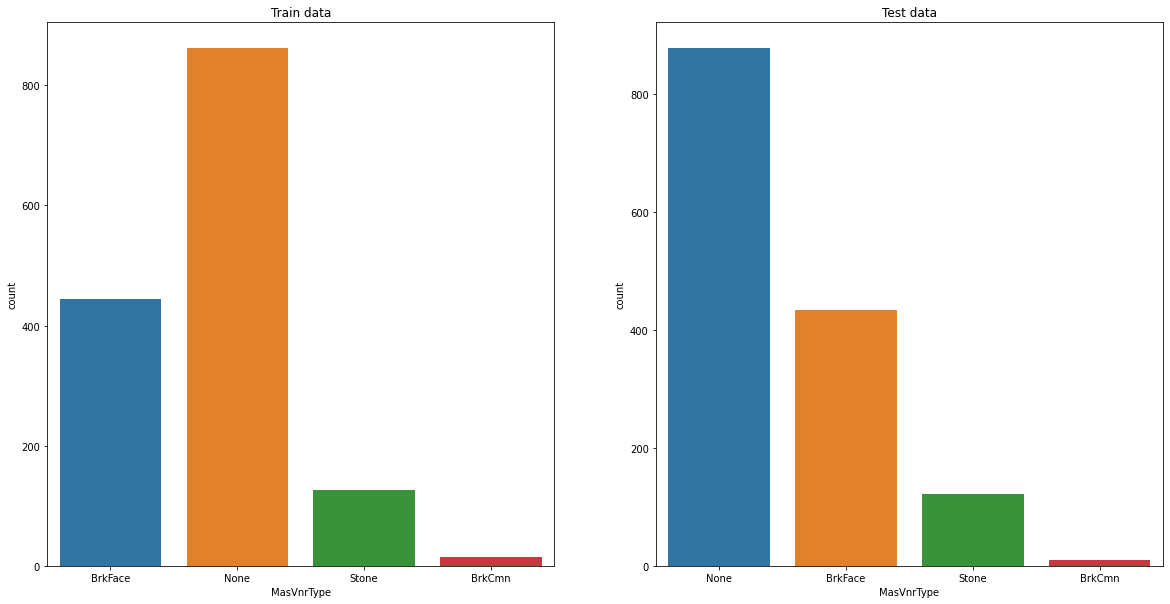

In [29]:
figure, ax = plt.subplots(1,2, figsize = (20,10))
train = sns.countplot(x='MasVnrType',data=train_df, ax = ax[0])
train.set_title('Train data')
test = sns.countplot(x='MasVnrType',data=test_df, ax = ax[1])
test.set_title('Test data')
plt.show()

Looks like 'None' value is the most used. We will fill missing values with it.

In [30]:
train_df.loc[train_df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
train_df.loc[train_df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

test_df.loc[test_df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
test_df.loc[test_df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

For the train set we have only two parameters with missing values left. We will skip 'LotFrontage' for later and now focus on the 'Electrical'. It is just one value so simple step is just to drop it, but I found it's very interesting to find the patterns for filling the value.

Firstly, let's check distribution of values by countplot

<AxesSubplot:xlabel='Electrical', ylabel='count'>

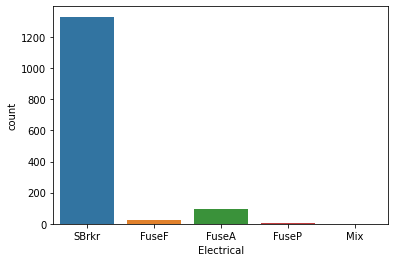

In [31]:
sns.countplot(x=train_df['Electrical'], data = train_df)

The most common type is 'SBrkr'. Let's find out where is our house with the missing value located.

In [32]:
train_df[train_df['Electrical'].isna()]['Neighborhood']

1379    Timber
Name: Neighborhood, dtype: object

Now we count types for this specific Neighborhood

<AxesSubplot:xlabel='Electrical', ylabel='count'>

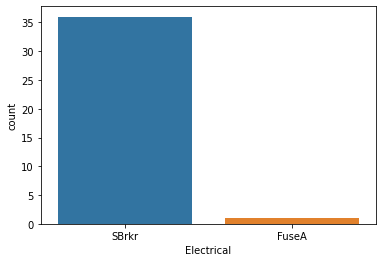

In [33]:
sns.countplot(x=train_df[train_df['Neighborhood'] == 'Timber' ]['Electrical'],data=train_df)

Again, the most common is 'SBrkr'. Now let's check the house type.

In [34]:
train_df[train_df['Electrical'].isna()]['MSSubClass']

1379    80
Name: MSSubClass, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='count'>

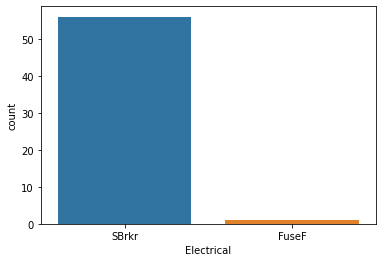

In [35]:
sns.countplot(x=train_df[train_df['MSSubClass'] == 80 ]['Electrical'],data=train_df)

Looks like we don't have another choice. We fill the missing value with 'SBrkr'

In [36]:
train_df.loc[train_df['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

Now, we will fill missing value in the test set. Let's see how many parameters left after our first filling.

Total of 16 parameters. We will start with 'MSZoning'

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

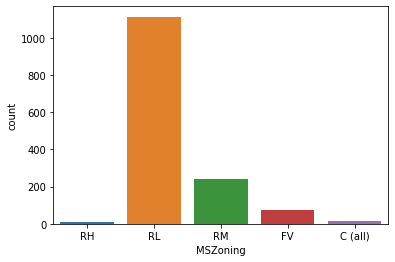

In [37]:
sns.countplot(x=test_df['MSZoning'], data = test_df)

So, the most comon is 'RL' let's print head of our dataset for these four houses.

In [38]:
test_df[test_df['MSZoning'].isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,Reg,Lvl,NaN,Inside,...,24,0,0,0,0,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,Reg,Lvl,AllPub,Inside,...,0,135,0,0,0,0,5,2006,WD,Normal


At first glance, there is nothing interesting. Let's try with 'Neighborhood'

In [39]:
test_df[test_df['MSZoning'].isna()]['Neighborhood']

455      IDOTRR
756      IDOTRR
790      IDOTRR
1444    Mitchel
Name: Neighborhood, dtype: object

There is 3 houses in the IDOTRR and one in Mitchel. First, we start with IDOTRR

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

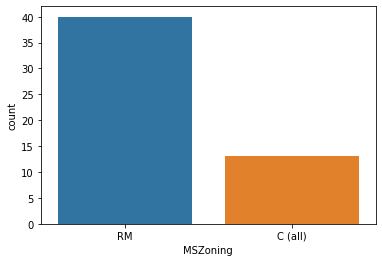

In [40]:
sns.countplot(x=test_df[test_df['Neighborhood'] == 'IDOTRR' ]['MSZoning'],data=test_df)

The most common type in this neighborhood is 'RM' while 'RL' is not even being used. Let's fill our 3 houses with 'RM'

In [41]:
test_df.loc[(test_df['MSZoning'].isnull()) & (test_df['Neighborhood']=='IDOTRR'), 'MSZoning'] = 'RM'

Now we check 'Mitchel' neighborhood.

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

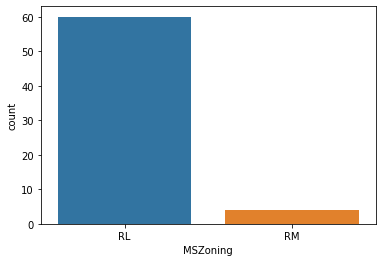

In [42]:
sns.countplot(x=test_df[test_df['Neighborhood'] == 'Mitchel' ]['MSZoning'],data=train_df)

'RL' is the most common here. We will use it for our last house.

In [43]:
test_df.loc[(test_df['MSZoning'].isnull()) & (test_df['Neighborhood']=='Mitchel'), 'MSZoning'] = 'RL'

Now let's check unique values for the 'Utilities'

In [44]:
test_df['Utilities'].unique()

array(['AllPub', nan], dtype=object)

Well, that one was easy. 'AllPub' it is.

In [45]:
test_df.loc[test_df['Utilities'].isnull(), 'Utilities'] = 'AllPub'

Next are basement parameters. First, we check if there is a basement at all.

In [46]:
test_df[test_df['BsmtFullBath'].isnull()]['BsmtQual']

660    None
728    None
Name: BsmtQual, dtype: object

No basement means no bath. Let's fill it

In [47]:
test_df.loc[test_df['BsmtFullBath'].isnull(), 'BsmtFullBath'] = 0
test_df.loc[test_df['BsmtHalfBath'].isnull(), 'BsmtHalfBath'] = 0
test_df.loc[test_df['BsmtFinSF1'].isnull(), 'BsmtFinSF1'] = 0
test_df.loc[test_df['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = 0
test_df.loc[test_df['BsmtFinSF2'].isnull(), 'BsmtFinSF2'] = 0
test_df.loc[test_df['BsmtUnfSF'].isnull(), 'BsmtUnfSF'] = 0

Next one is 'Functional' lets create countplot.

<AxesSubplot:xlabel='Functional', ylabel='count'>

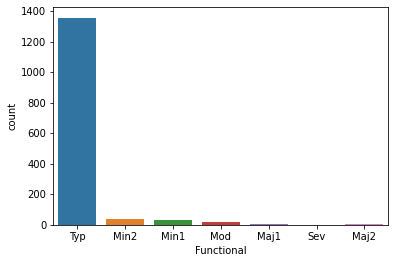

In [48]:
sns.countplot(x=test_df['Functional'],data=test_df)

Her is my solution to how to fill these nissing values. First step: change types into integers.

In [49]:
test_df.loc[test_df['Functional']== 'Typ', 'Functional'] = 8
test_df.loc[test_df['Functional']== 'Min1', 'Functional'] = 7
test_df.loc[test_df['Functional']== 'Min2', 'Functional'] = 6
test_df.loc[test_df['Functional']== 'Mod', 'Functional'] = 5
test_df.loc[test_df['Functional']== 'Maj1', 'Functional'] = 4
test_df.loc[test_df['Functional']== 'Maj2', 'Functional'] = 3
test_df.loc[test_df['Functional']== 'Sev', 'Functional'] = 2
test_df.loc[test_df['Functional']== 'Sal', 'Functional'] = 1
test_df.loc[test_df['Functional'].isnull(), 'Functional'] = 0

train_df.loc[train_df['Functional']== 'Typ', 'Functional'] = 8
train_df.loc[train_df['Functional']== 'Min1', 'Functional'] = 7
train_df.loc[train_df['Functional']== 'Min2', 'Functional'] = 6
train_df.loc[train_df['Functional']== 'Mod', 'Functional'] = 5
train_df.loc[train_df['Functional']== 'Maj1', 'Functional'] = 4
train_df.loc[train_df['Functional']== 'Maj2', 'Functional'] = 3
train_df.loc[train_df['Functional']== 'Sev', 'Functional'] = 2
train_df.loc[train_df['Functional']== 'Sal', 'Functional'] = 1

In [50]:
pd.to_numeric(train_df['Functional'])
train_df['Functional'] = train_df['Functional'].astype(int)
pd.to_numeric(test_df['Functional'])
test_df['Functional'] = test_df['Functional'].astype(int)

Second step: check the correlation between 'Functional' and other parameters.

In [51]:
test_df.corr()['Functional'].sort_values(ascending=False)

Functional       1.000000
OverallQual      0.220988
YearBuilt        0.188703
OverallCond      0.142347
YearRemodAdd     0.136649
TotalBsmtSF      0.131896
GarageCars       0.075436
BsmtFinSF1       0.073735
GarageYrBlt      0.072600
GarageArea       0.064430
MasVnrArea       0.064285
BsmtUnfSF        0.060142
HalfBath         0.050635
BsmtFullBath     0.049566
YrSold           0.033897
FullBath         0.022246
WoodDeckSF       0.021188
BsmtHalfBath     0.015464
MiscVal          0.002345
MSSubClass      -0.001845
BedroomAbvGr    -0.007685
BsmtFinSF2      -0.007717
ScreenPorch     -0.009809
KitchenAbvGr    -0.011247
2ndFlrSF        -0.012850
OpenPorchSF     -0.022644
MoSold          -0.028414
1stFlrSF        -0.034452
TotRmsAbvGrd    -0.038443
Fireplaces      -0.041498
3SsnPorch       -0.046885
GrLivArea       -0.047643
Id              -0.055253
LotFrontage     -0.058715
LowQualFinSF    -0.091081
EnclosedPorch   -0.110805
PoolArea        -0.127076
LotArea         -0.183440
Name: Functi

The best correlations are with 'OverallQual', 'YearBuilt' and 'OverallCond'. We will use the first and the third because 'YearBuilt' has a lot of unique values. It makes sense, because the functional of the house is depended on it's quality and represented by its condition.      

Third step: check quality and condition for both houses.

In [52]:
display(test_df[test_df['Functional']== 0]['OverallQual'])
display(test_df[test_df['Functional']== 0]['OverallCond'])

756     1
1013    4
Name: OverallQual, dtype: int64

756     5
1013    1
Name: OverallCond, dtype: int64

Fourth step: check mean values of functional for both parameters.

In [53]:
display(train_df[train_df['OverallQual']==1]['Functional'].mean())
display(train_df[train_df['OverallCond']==5]['Functional'].mean())

6.0

7.897310513447433

In [54]:
display(train_df[train_df['OverallQual']==4]['Functional'].mean())
display(train_df[train_df['OverallCond']==1]['Functional'].mean())

7.793103448275862

4.0

Now, we take mean value from both parameters. For the first house it will be 7 and for the secon is 6.

In [55]:
test_df.loc[(test_df['OverallQual']==1) & (test_df['OverallCond']==5), 'Functional'] = 7
test_df.loc[(test_df['OverallQual']==4) & (test_df['OverallCond']==1), 'Functional'] = 6

Now it's time for 'Exterior1st'

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

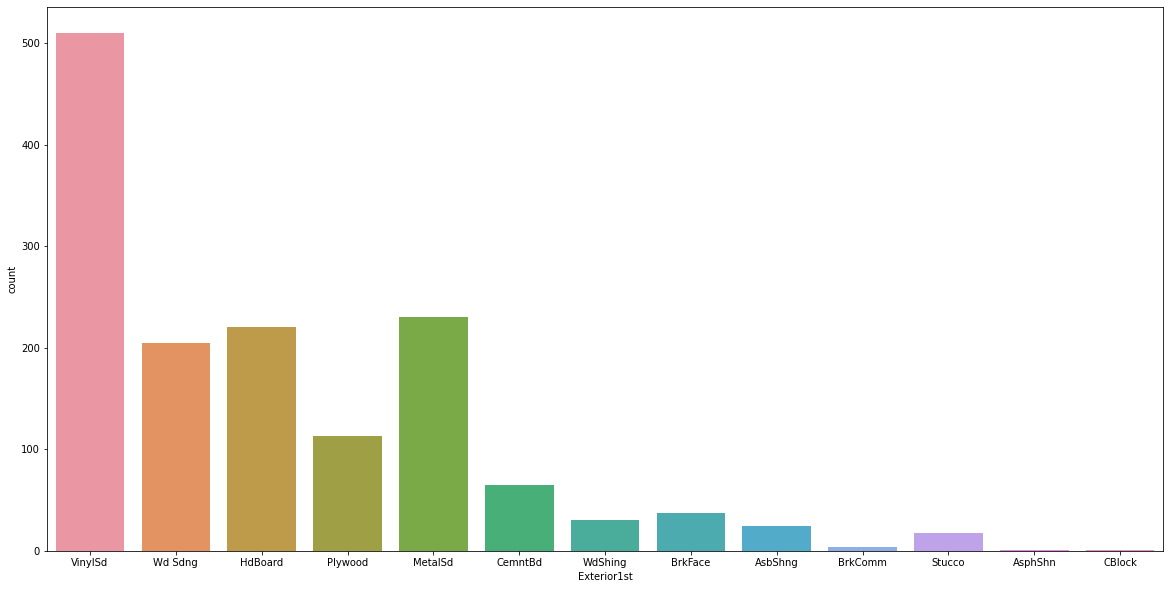

In [56]:
plt.figure(figsize=(20,10))
sns.countplot(x=test_df['Exterior1st'],data=test_df)

The most common is 'VinylSd'. Now we check MSSubClass.

In [57]:
test_df[test_df['Exterior1st'].isnull()]['MSSubClass']

691    30
Name: MSSubClass, dtype: int64

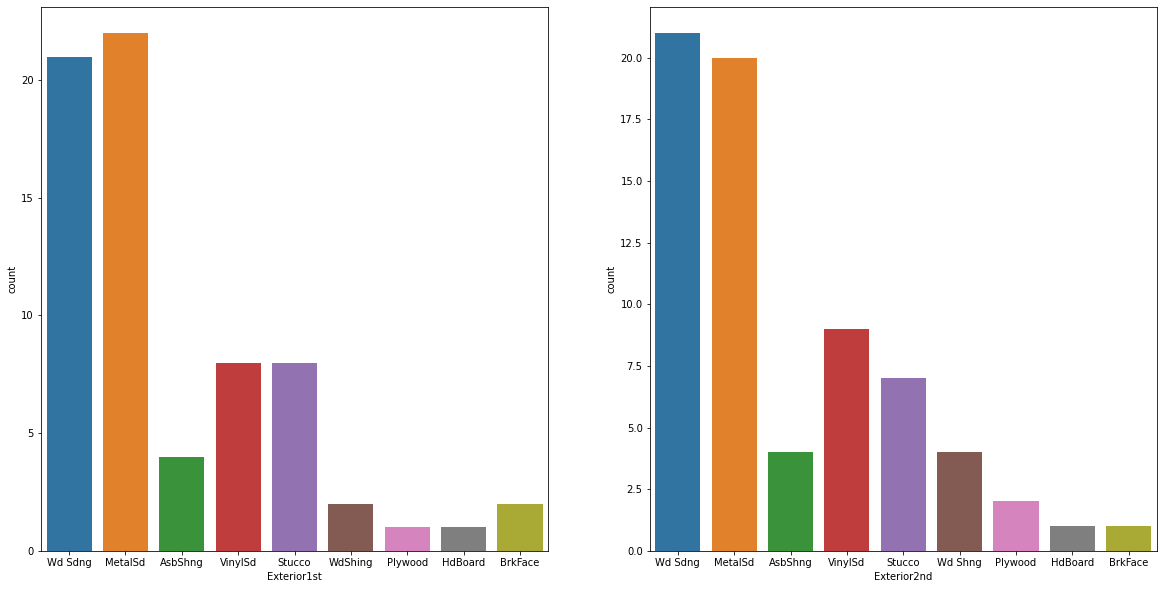

In [58]:
figure, ax = plt.subplots(1,2,figsize=(20,10))
ex1 = sns.countplot(x =test_df[test_df['MSSubClass']==30]['Exterior1st'],data=test_df, ax = ax[0])

ex2 = sns.countplot(x =test_df[test_df['MSSubClass']==30]['Exterior2nd'],data=test_df, ax = ax[1])

Looks like for this type of SubClass 'Wd Sding' and 'MetalSd' are more common than 'VinylSd'. Let's check building type.

In [59]:
test_df[test_df['Exterior1st'].isna()]['BldgType']

691    1Fam
Name: BldgType, dtype: object

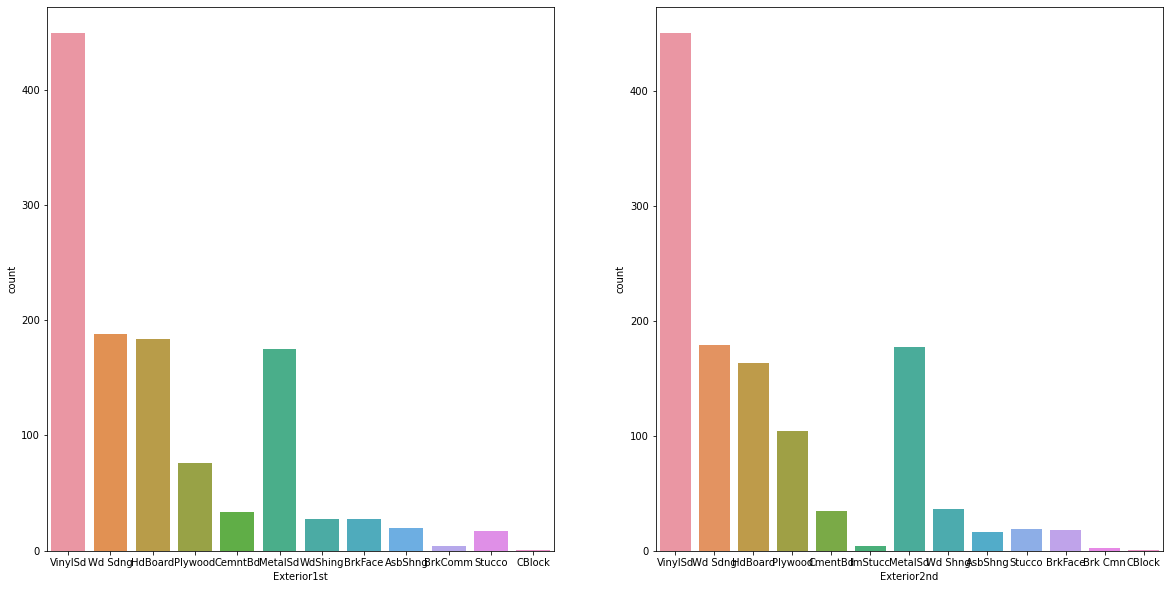

In [60]:
figure, ax = plt.subplots(1,2,figsize=(20,10))
ex1 = sns.countplot(x =test_df[test_df['BldgType']=='1Fam']['Exterior1st'],data=test_df, ax = ax[0])

ex2 = sns.countplot(x =test_df[test_df['BldgType']=='1Fam']['Exterior2nd'],data=test_df, ax = ax[1])

Hard to choose which one fits the best. In our case we fill it with 'VinylSd'.

In [61]:
test_df.loc[test_df['Exterior1st'].isnull(), 'Exterior1st'] = 'VinylSd'
test_df.loc[test_df['Exterior2nd'].isnull(), 'Exterior2nd'] = 'VinylSd'

Next parameter is 'SaleType'. Again observe it with countplot.

<AxesSubplot:xlabel='SaleType', ylabel='count'>

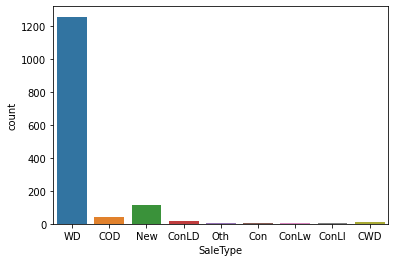

In [62]:
sns.countplot(x=test_df['SaleType'],data=test_df)

We will use the most common here.

In [63]:
test_df.loc[test_df['SaleType'].isnull(), 'SaleType'] = 'WD'

For the 'GarageCars' let's check if there is garage at all.

In [64]:
display(test_df[test_df['GarageCars'].isnull()]['GarageArea'])
display(test_df[test_df['GarageCars'].isnull()]['GarageQual'])

1116   NaN
Name: GarageArea, dtype: float64

1116    NoGarage
Name: GarageQual, dtype: object

There is no garage so fill with zeros

In [65]:
test_df.loc[test_df['GarageCars'].isnull(), 'GarageCars'] = 0
test_df.loc[test_df['GarageArea'].isnull(), 'GarageArea'] = 0

Next is 'KitchenQual'. We will fill it based on 'OverallQual' and 'OverallCond'

In [66]:
display(test_df[test_df['KitchenQual'].isnull()]['OverallCond'])
display(test_df[test_df['KitchenQual'].isnull()]['OverallQual'])

95    3
Name: OverallCond, dtype: int64

95    5
Name: OverallQual, dtype: int64

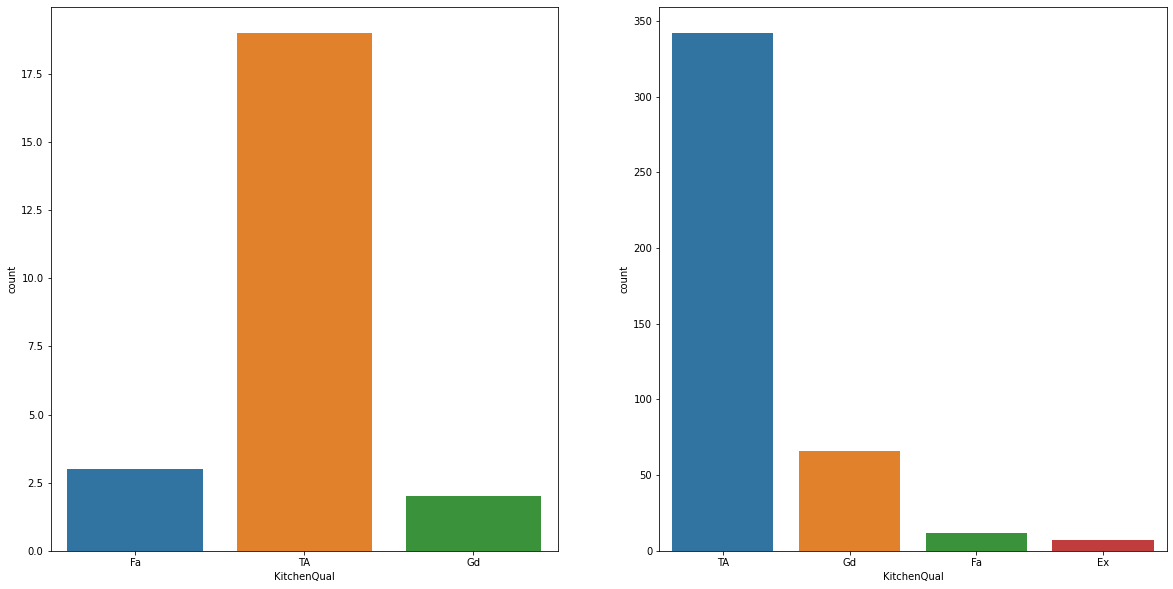

In [67]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
p1 = sns.countplot(x=test_df[test_df['OverallCond']==3]['KitchenQual'], data=test_df, ax = ax[0])
p2 = sns.countplot(x=test_df[test_df['OverallQual']==5]['KitchenQual'], data=test_df, ax = ax[1])
plt.show()

Looks like the 'TA' type is the best fit for us.

In [68]:
test_df.loc[test_df['KitchenQual'].isnull(), 'KitchenQual'] = 'TA'

# 4.Filling missing vlues for the 'LotFrontage'

Now the only parameter with missing values is 'LotFrontage' for both datasets. But there is a problem. This parameter has about 16% of missing values so filling it manually will take a lot of time. I dont's like the idea of filling with mean values because it can affect our further predictions. My idea is to split the data on two sets: one with missing values and another one with filled. Than we will use simple LinearRegression model. We will train it on the second set and then will use it on the first.

First, we start with transforming some our numerical categories into conditional ones.

## 4.1.Data transforming

In [69]:
category = ['MSSubClass', 'OverallQual', 'OverallCond', 'Functional', 'BsmtFullBath', 'BsmtHalfBath',
            'FullBath', 'HalfBath','TotRmsAbvGrd', 'GarageCars',
            'MoSold', 'YrSold']
train_df[category] = train_df[category].astype(str)
test_df[category] = test_df[category].astype(str)

Now, we check skewness of our data.

In [70]:
from scipy.stats import norm, skew

In [71]:
numeric = train_df.dtypes[train_df.dtypes != "object"].index
numeric = numeric.drop(numeric[0])
skewed_par = train_df[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_par})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.409802
PoolArea,15.915939
LotArea,12.588148
3SsnPorch,10.275636
LowQualFinSF,9.243101
KitchenAbvGr,4.515248
BsmtFinSF2,4.242537
ScreenPorch,4.138262
EnclosedPorch,3.079918
MasVnrArea,2.482363


Now it's time to correct our skewed data. We will use log(1+x) transformation which is very good to deal with positive skewness. 

In [72]:
skewness = skewness[abs(skewness) > 0.75]
skewed_params = skewness.index
for param in skewed_params:
    train_df[param] = np.log1p(train_df[param])
       

The same steps for the tes data.

In [73]:
numeric = test_df.dtypes[test_df.dtypes != "object"].index
numeric = numeric.drop(numeric[0])
skewed_par = test_df[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_par})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038796
ScreenPorch,3.784349
LotArea,3.112013
OpenPorchSF,2.685015


In [74]:
skewness = skewness[abs(skewness) > 0.75]
skewed_params = skewness.index
for param in skewed_params:
    test_df[param] = np.log1p(test_df[param])    

For the next step we need to concatenate train_df and test_df because when get_dummies() is used separately for both dataframes the number of parameters differs.

In [75]:
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)

Now we transform our object data into numbers.

In [76]:
all_data = pd.get_dummies(all_data)

In [77]:
test_df = all_data[all_data['SalePrice'].isnull()]
train_df = all_data[all_data['SalePrice'].notnull()]

In [78]:
train_df = train_df.drop('Id', axis = 1)

Now, let's split train dataset.

In [79]:
train_df1 = train_df[train_df['LotFrontage'].isnull()]
train_df2 = train_df[train_df['LotFrontage'].notnull()]

Let's find the most correlated parameters for the 'LotFrontage'.

In [80]:
lfcor = train_df2.corr()['LotFrontage'].sort_values(axis=0, ascending=False, inplace=False)
hlfcor = list(lfcor.loc[np.where(lfcor>0.3, 1, 0)==1].index)
hlfcor

['LotFrontage',
 'LotArea',
 'BldgType_1Fam',
 '1stFlrSF',
 'MSZoning_RL',
 'SalePrice',
 'GrLivArea',
 'BedroomAbvGr']

In [81]:
hlfcor.remove('LotFrontage')
hlfcor.remove('SalePrice')

Import Linear egression model

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [83]:
#cols = ['BldgType_TwnhsE', 'BldgType_Twnhs','MSSubClass','BldgType_1Fam', '1stFlrSF', 'LotArea', 'GrLivArea', 'MSZoning_RL', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea' ]
X = train_df2[hlfcor]
y = train_df2['LotFrontage']

Apply train test split on the data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
linreg = LinearRegression()

In [86]:
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mean_squared_error(y_test,y_pred)

0.044450232364735685

In [87]:
linreg.fit(train_df2[hlfcor], train_df2['LotFrontage'])
train_df1.loc[train_df1['LotFrontage'].isnull(), 'LotFrontage'] = linreg.predict(train_df1[hlfcor])

Now we merge two sets back into one

In [88]:
train_df3 = pd.concat([train_df1, train_df2], axis=0, join='inner')

Now let's compare 'LotFrontage' before and after filling

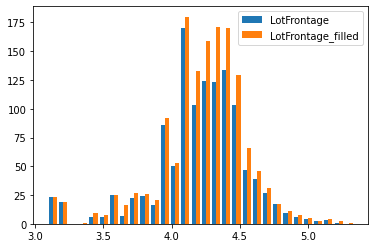

In [89]:
x=train_df['LotFrontage']
y=train_df3['LotFrontage']

plt.hist([x, y], bins=30, label=['LotFrontage', 'LotFrontage_filled'])
plt.legend(loc='upper right')
plt.show()

The distribution looks good. Next step is to perform the same operation on the test data.

In [90]:
test_df = pd.get_dummies(test_df)

In [91]:
test_df1 = test_df[test_df['LotFrontage'].isnull()]
test_df2 = test_df[test_df['LotFrontage'].notnull()]

In [92]:
lfcor = test_df2.corr()['LotFrontage'].sort_values(axis=0, ascending=False, inplace=False)
hlfcor2 = list(lfcor.loc[np.where(lfcor>0.3, 1, 0)==1].index)
hlfcor2

['LotFrontage',
 'LotArea',
 'BldgType_1Fam',
 '1stFlrSF',
 'MSZoning_RL',
 'MSSubClass_20',
 'GarageCars_3.0',
 'GrLivArea']

In [93]:
hlfcor2.remove('LotFrontage')

In [94]:
#cols = ['BldgType_TwnhsE', 'BldgType_Twnhs','MSSubClass','BldgType_1Fam', '1stFlrSF', 'LotArea', 'GrLivArea', 'MSZoning_RL', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea' ]
X = test_df2[hlfcor2]
y = test_df2['LotFrontage']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
linreg = LinearRegression()

In [97]:
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mean_squared_error(y_test,y_pred)

0.0391628521514967

In [98]:
linreg.fit(test_df2[hlfcor2], test_df2['LotFrontage'])
test_df1.loc[test_df1['LotFrontage'].isnull(), 'LotFrontage'] = linreg.predict(test_df1[hlfcor2])

In [99]:
test_df3 = pd.concat([test_df1, test_df2], axis=0, join='inner')

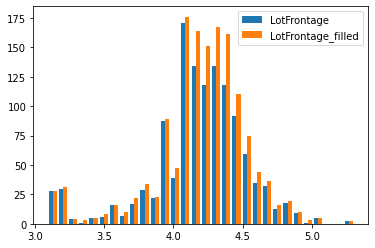

In [100]:
x=test_df['LotFrontage']
y=test_df3['LotFrontage']

plt.hist([x, y], bins=30, label=['LotFrontage', 'LotFrontage_filled'])
plt.legend(loc='upper right')
plt.show()

In [101]:
test_df3 = test_df3.sort_values(by='Id', axis = 0, ascending=True)

# 5.Sale price predictions

Now we import some models and test them on our train set.

In [102]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
import xgboost as xgb
import lightgbm as lgb

In [103]:
X = train_df3.drop('SalePrice', axis=1)
y = train_df3['SalePrice']

We will use cross validation for this case.

In [104]:
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=101).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

As first model we will use linear regression.

In [105]:
linreg = make_pipeline(RobustScaler(), LinearRegression())

In [106]:
score = rmse_cv(linreg)
print("\nLinReg score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LinReg score: 0.1226 (0.0086)



Not a bad score for the simple model. Next we will use Ridge, Lasso and Elastic Net models. These models additionally use constant alpha which controls regularization strength. Let's create the set of different alpha's values and see which is the best.

Ridge model first.

In [107]:
alpha = [1e-15, 1e-10, 1e-8,1e-5,1e-4,5e-4, 1e-3,5e-3,1e-2,5e-2,0.1,0.5,1,1.5, 2,3,4,5,10,20,30,40]
temp_score = {}
for i in alpha:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha = i))
    score = rmse_cv(ridge)
    temp_score[i] = score

Now we print scores, based on alpha. 

In [108]:
ki = list(temp_score.keys())
mv = []
stdv = []
for i in temp_score:
    mv.append(temp_score[i].mean())
    stdv.append(temp_score[i].std())
for item_key, item_mv, item_stdv in zip(ki, mv, stdv):
    print("\nRidge score: alpha: {:}, mean: {:.4f}, std: ({:.4f})\n".format(item_key, item_mv, item_stdv))


Ridge score: alpha: 1e-15, mean: 2.2028, std: (1.7029)


Ridge score: alpha: 1e-10, mean: 0.1229, std: (0.0085)


Ridge score: alpha: 1e-08, mean: 0.1229, std: (0.0085)


Ridge score: alpha: 1e-05, mean: 0.1229, std: (0.0085)


Ridge score: alpha: 0.0001, mean: 0.1229, std: (0.0085)


Ridge score: alpha: 0.0005, mean: 0.1228, std: (0.0085)


Ridge score: alpha: 0.001, mean: 0.1228, std: (0.0085)


Ridge score: alpha: 0.005, mean: 0.1228, std: (0.0085)


Ridge score: alpha: 0.01, mean: 0.1227, std: (0.0085)


Ridge score: alpha: 0.05, mean: 0.1227, std: (0.0085)


Ridge score: alpha: 0.1, mean: 0.1226, std: (0.0085)


Ridge score: alpha: 0.5, mean: 0.1224, std: (0.0085)


Ridge score: alpha: 1, mean: 0.1222, std: (0.0085)


Ridge score: alpha: 1.5, mean: 0.1219, std: (0.0084)


Ridge score: alpha: 2, mean: 0.1217, std: (0.0084)


Ridge score: alpha: 3, mean: 0.1214, std: (0.0083)


Ridge score: alpha: 4, mean: 0.1211, std: (0.0083)


Ridge score: alpha: 5, mean: 0.1209, std: (0.0082)



Same for the Lasso model.

In [109]:
for i in alpha:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha = i))
    score = rmse_cv(lasso)
    temp_score[i] = score

In [110]:
ki = list(temp_score.keys())
mv = []
stdv = []
for i in temp_score:
    mv.append(temp_score[i].mean())
    stdv.append(temp_score[i].std())
for item_key, item_mv, item_stdv in zip(ki, mv, stdv):
    print("\nLasso score: alpha: {:}, mean: {:.4f}, std: ({:.4f})\n".format(item_key, item_mv, item_stdv))


Lasso score: alpha: 1e-15, mean: 0.1222, std: (0.0086)


Lasso score: alpha: 1e-10, mean: 0.1222, std: (0.0086)


Lasso score: alpha: 1e-08, mean: 0.1222, std: (0.0086)


Lasso score: alpha: 1e-05, mean: 0.1220, std: (0.0085)


Lasso score: alpha: 0.0001, mean: 0.1202, std: (0.0085)


Lasso score: alpha: 0.0005, mean: 0.1161, std: (0.0085)


Lasso score: alpha: 0.001, mean: 0.1145, std: (0.0087)


Lasso score: alpha: 0.005, mean: 0.1141, std: (0.0116)


Lasso score: alpha: 0.01, mean: 0.1209, std: (0.0127)


Lasso score: alpha: 0.05, mean: 0.1770, std: (0.0176)


Lasso score: alpha: 0.1, mean: 0.2309, std: (0.0258)


Lasso score: alpha: 0.5, mean: 0.3983, std: (0.0385)


Lasso score: alpha: 1, mean: 0.3983, std: (0.0385)


Lasso score: alpha: 1.5, mean: 0.3983, std: (0.0385)


Lasso score: alpha: 2, mean: 0.3983, std: (0.0385)


Lasso score: alpha: 3, mean: 0.3983, std: (0.0385)


Lasso score: alpha: 4, mean: 0.3983, std: (0.0385)


Lasso score: alpha: 5, mean: 0.3983, std: (0.0385)



And the Elastic Net.

In [111]:
for i in alpha:
    elnet = make_pipeline(RobustScaler(), ElasticNet(alpha = i))
    score = rmse_cv(elnet)
    temp_score[i] = score

In [112]:
ki = list(temp_score.keys())
mv = []
stdv = []
for i in temp_score:
    mv.append(temp_score[i].mean())
    stdv.append(temp_score[i].std())
for item_key, item_mv, item_stdv in zip(ki, mv, stdv):
    print("\nElasticNet score: alpha: {:}, mean: {:.4f}, std: ({:.4f})\n".format(item_key, item_mv, item_stdv))


ElasticNet score: alpha: 1e-15, mean: 0.1222, std: (0.0086)


ElasticNet score: alpha: 1e-10, mean: 0.1222, std: (0.0086)


ElasticNet score: alpha: 1e-08, mean: 0.1222, std: (0.0086)


ElasticNet score: alpha: 1e-05, mean: 0.1212, std: (0.0088)


ElasticNet score: alpha: 0.0001, mean: 0.1152, std: (0.0098)


ElasticNet score: alpha: 0.0005, mean: 0.1130, std: (0.0099)


ElasticNet score: alpha: 0.001, mean: 0.1138, std: (0.0107)


ElasticNet score: alpha: 0.005, mean: 0.1316, std: (0.0127)


ElasticNet score: alpha: 0.01, mean: 0.1434, std: (0.0129)


ElasticNet score: alpha: 0.05, mean: 0.1766, std: (0.0173)


ElasticNet score: alpha: 0.1, mean: 0.2094, std: (0.0230)


ElasticNet score: alpha: 0.5, mean: 0.3692, std: (0.0339)


ElasticNet score: alpha: 1, mean: 0.3768, std: (0.0339)


ElasticNet score: alpha: 1.5, mean: 0.3768, std: (0.0339)


ElasticNet score: alpha: 2, mean: 0.3769, std: (0.0340)


ElasticNet score: alpha: 3, mean: 0.3772, std: (0.0341)


ElasticNet score: alpha: 

The next will be boosting regressor models. We will use GradientBoostingRegressor, XGBRegressor and LGBMRegressor.

In [113]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [114]:
score = rmse_cv(GBoost)
print("\nGBR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GBR score: 0.1176 (0.0124)



In [115]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.46, gamma=0.047, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7, n_estimators=1000,
                             reg_alpha=0.46, reg_lambda=0.86,
                             subsample=0.5,
                             random_state =7, nthread = -1)

In [116]:
score = rmse_cv(model_xgb)
print("\nXGBR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGBR score: 0.1199 (0.0114)



In [117]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.5,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9)

In [118]:
score = rmse_cv(model_lgb)
print("\nLGBMR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

Now, let's create ensemble of the models. We recreate ridge, lasso and elastic net with the best alpha.

In [119]:
ridge = make_pipeline(StandardScaler(), Ridge(alpha = 40))
lasso = make_pipeline(StandardScaler(), Lasso(alpha = 0.001))
elnet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005))

Now we fit all our models.

In [120]:

elastic_model_full_data = elnet.fit(X, y)

lasso_model_full_data = lasso.fit(X, y)

ridge_model_full_data = ridge.fit(X, y)


gbr_model_full_data = GBoost.fit(X, y)

xgb_model_full_data = model_xgb.fit(X, y)

lgb_model_full_data = model_lgb.fit(X, y)

[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [121]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

Next step is to compose our ensemble.

In [122]:
def blend_models_predict(X):
    return ((0.20 * elastic_model_full_data.predict(X)) + \
            (0.20 * lasso_model_full_data.predict(X)) + \
            (0.15 * ridge_model_full_data.predict(X)) + \
            (0.15 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.15 * lgb_model_full_data.predict(X)))

In [123]:
rmsle(y, blend_models_predict(X))

0.07684492739016417

Looks like our ensemble shows the best score. We will use it for the final prediction.

In [124]:
test_id = test_df3['Id']
test_X = test_df3.drop('Id', axis=1)
test_X = test_X.drop('SalePrice', axis=1)

In [125]:
test_price = blend_models_predict(test_X)
test_price = np.expm1(test_price)

# 6.Submission

In [126]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = test_price
sub = sub.reset_index(drop=True)
sub.head()
sub.to_csv('ak_submission.csv',index=False)

**Thank you very much! Hope this kernel will help you in your data science journey!**